# **STOCK PRICE PREDICTION**

In [ ]:
# connecting drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading dataset
df_stock = pd.read_csv("/content/gdrive/MyDrive/stock_price_prediction/Dataset/social media stocks 2012-2022.csv")

In [ ]:
#checking dataframe
df_stock

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0


In [ ]:
# identifying shape of dataset
df_stock.shape

(8398, 8)

In [ ]:
#reading first 5 rows
df_stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0


In [ ]:
#reading last 5 rows
df_stock.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0
8397,2022-04-06,ETSY,125.470001,125.470001,128.229996,121.389999,128.179993,3521700.0


In [ ]:
#display names of columns
df_stock.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [ ]:
# basic information about dataset
df_stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8398 non-null   object 
 1   Symbol     8398 non-null   object 
 2   Adj Close  8398 non-null   float64
 3   Close      8398 non-null   float64
 4   High       8398 non-null   float64
 5   Low        8398 non-null   float64
 6   Open       8398 non-null   float64
 7   Volume     8398 non-null   float64
dtypes: float64(6), object(2)
memory usage: 525.0+ KB


In [ ]:
#understanding mean,min,max,etc for each columns
df_stock.describe()

,Adj Close,Close,High,Low,Open,Volume
count,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8.398000e+03
mean,74.629153,74.629153,75.854724,73.371072,74.635965,2.013473e+07
std,77.429806,77.429806,78.458779,76.373650,77.421378,2.239180e+07
min,4.990000,4.990000,5.140000,4.820000,4.960000,1.900000e+05
25%,20.832500,20.832500,21.322500,20.342500,20.812500,7.981975e+06
50%,42.830000,42.830000,43.795000,41.873001,42.869999,1.557740e+07
75%,94.387501,94.387501,95.687502,93.344999,94.334999,2.470900e+07
max,382.179993,382.179993,384.329987,378.809998,381.679993,5.735764e+08


In [ ]:
#understanding correlations among columns 
df_stock.corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999776,0.999787,0.999561,-0.039116
Close,1.000000,1.000000,0.999776,0.999787,0.999561,-0.039116
High,0.999776,0.999776,1.000000,0.999649,0.999786,-0.037702
Low,0.999787,0.999787,0.999649,1.000000,0.999750,-0.040197
Open,0.999561,0.999561,0.999786,0.999750,1.000000,-0.039076
Volume,-0.039116,-0.039116,-0.037702,-0.040197,-0.039076,1.000000


In [ ]:
# checking for null values
df_stock.isnull()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8393,False,False,False,False,False,False,False,False
8394,False,False,False,False,False,False,False,False
8395,False,False,False,False,False,False,False,False
8396,False,False,False,False,False,False,False,False


In [ ]:
# cheecking whtether it contains duplicates
df_stock.duplicated().sum()


0

In [ ]:
#count of null values
df_stock.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

### **Data Visualization**

In [ ]:
# converting date column into index
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock = df_stock.set_index('Date')

In [ ]:
import plotly.io as plt_io

# this is for simple plotting with plotly express
import plotly.express as px

# create our custom_dark theme from the plotly_dark template
plt_io.templates["simple_white"] = plt_io.templates["simple_white"]

# set the paper_bgcolor and the plot_bgcolor to a new color
plt_io.templates["simple_white"]['layout']['paper_bgcolor'] = '#f5efcb'
plt_io.templates["simple_white"]['layout']['plot_bgcolor'] = '#f5efcb'

# you may also want to change gridline colors if you are modifying background
#plt_io.templates['simple_white']['layout']['yaxis']['gridcolor'] = '#4f687d'
#plt_io.templates['simple_white']['layout']['xaxis']['gridcolor'] = '#4f687d'

fig = px.line(df_stock, x=df_stock.index, y='Open', color='Symbol',  title='Stock prices', 
              color_discrete_sequence=px.colors.qualitative.Dark2)
fig.layout.template = 'simple_white'
fig.show()

In [ ]:
df_grouped_close = df_stock.groupby(['Symbol'], as_index=False)['Close'].mean()
df_grouped_close.head()

,Symbol,Close
0,ETSY,68.385668
1,FB,147.413416
2,PINS,40.759039
3,SNAP,26.401650
4,TWTR,35.549764


In [ ]:
plt_io.templates["simple_white"]['layout']['paper_bgcolor'] = '#f5efcb'
plt_io.templates["simple_white"]['layout']['plot_bgcolor'] = '#f5efcb'

fig = px.bar(df_grouped_close, x=df_grouped_close.Symbol, y='Close',
             color='Symbol',
             height=300, 
            title='Average value of shares over the years', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Antique)
fig.layout.template = 'simple_white'
fig.show()

In [ ]:
df_FB   = df_stock[df_stock['Symbol']== 'FB']
df_ETSY = df_stock[df_stock['Symbol']== 'ETSY']
df_PINS = df_stock[df_stock['Symbol']== 'PINS']
df_SNAP = df_stock[df_stock['Symbol']== 'SNAP']
df_TWTR = df_stock[df_stock['Symbol']== 'TWTR']

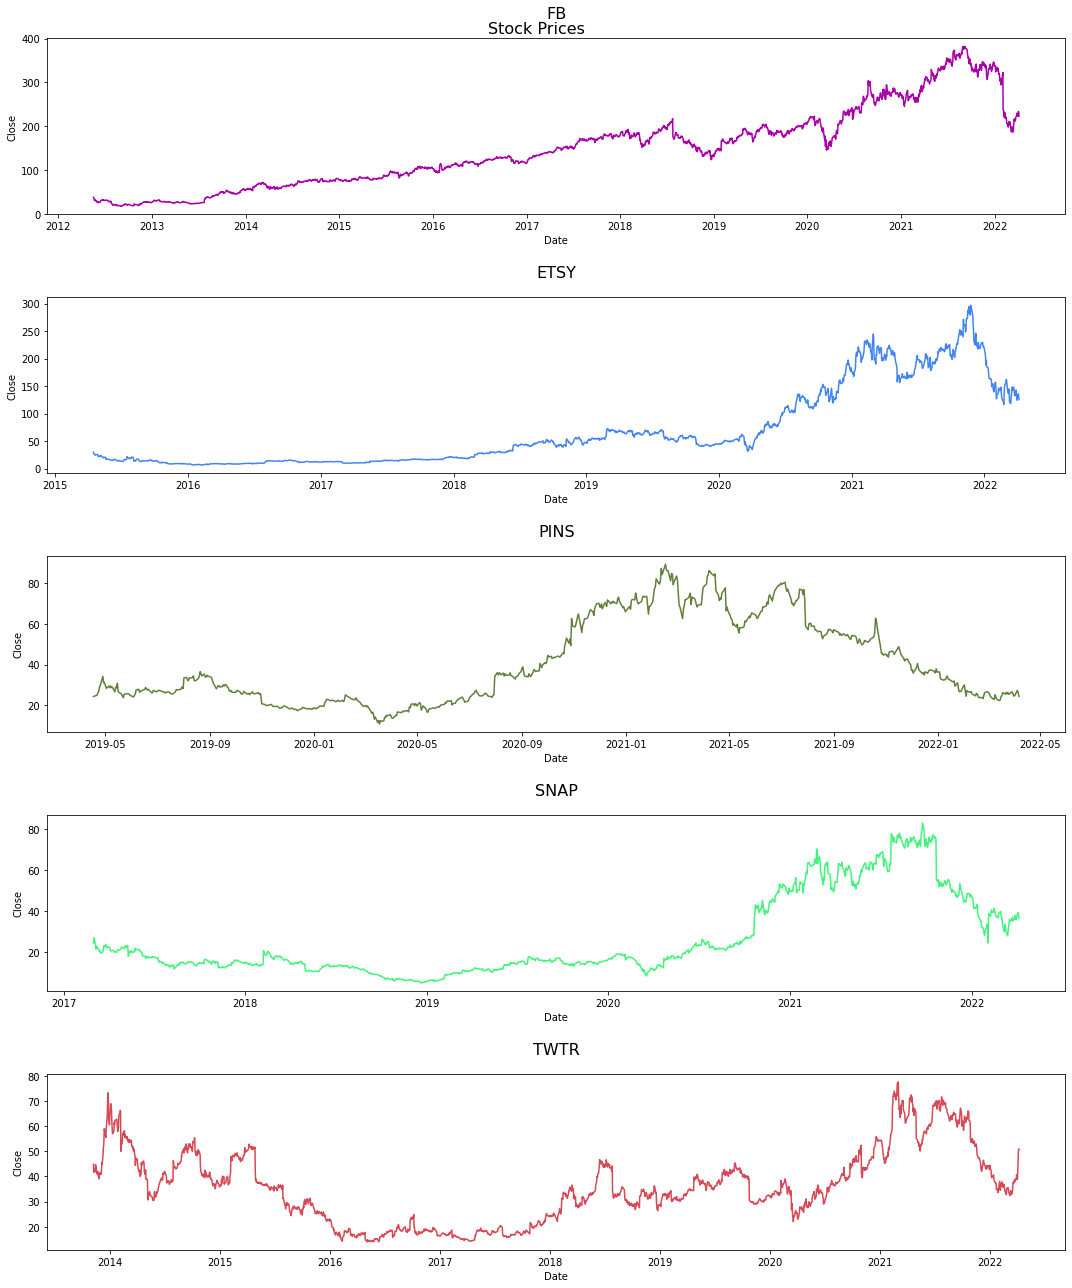

In [ ]:
fig, axes = plt.subplots(nrows=5, figsize=(15,18))

fig.suptitle("Stock Prices",fontsize=16)
sns.axes_style("whitegrid")

# 1
sns.lineplot(ax=axes[0],data=df_FB, x=df_FB.index, y='Close', color='#aa00aa')
axes[0].set_title('FB', fontsize=16, pad=20)

# 2
sns.lineplot(ax=axes[1],data=df_ETSY, x=df_ETSY.index, y='Close', color='#4385f0')
axes[1].set_title('ETSY', fontsize=16, pad=20)

# 3
sns.lineplot(ax=axes[2],data=df_PINS, x=df_PINS.index, y='Close', color='#60803c')
axes[2].set_title('PINS', fontsize=16, pad=20)

#  4
sns.lineplot(ax=axes[3],data=df_SNAP, x=df_SNAP.index, y='Close', color='#40f579')
axes[3].set_title('SNAP', fontsize=16, pad=20)

#  5
sns.lineplot(ax=axes[4],data=df_TWTR, x=df_TWTR.index, y='Close', color='#d64957')
axes[4].set_title('TWTR', fontsize=16, pad=20)

fig.tight_layout(h_pad=2, w_pad=3)

## **Modelling the data**

In [ ]:
import sklearn

print(sklearn.__version__)

1.0.2


In [ ]:
#making copy of a original dataset
df = df_stock.copy()

In [ ]:
#splitting the data into target and feature variables
#y as target  variable
y = df['Close']
# X indicates features that help in predicting target variable
X = df[['Symbol', 'High', 'Low', 'Open']]

In [ ]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
#reading first 5 rows of training features
X_train.head()

,Symbol,High,Low,Open
5308,FB,186.729996,182.800003,184.619995
5595,PINS,23.000000,22.059999,22.240000
3465,FB,177.550003,171.839996,177.059998
1039,TWTR,47.259998,45.790001,47.230000
678,FB,64.809998,63.349998,64.459999


In [ ]:
#identifying shape of the training data
print(X_train.shape, y_train.shape)
# identifying shape of the testing data
print(X_test.shape, y_test.shape)

(5878, 4) (5878,)
(2520, 4) (2520,)


### **Separating Categorical and Numerical Columns:**

In [ ]:
#understanding data types of training data
X_train.dtypes

Symbol     object
High      float64
Low       float64
Open      float64
dtype: object

In [ ]:
#retrieving only object data type from training data
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Symbol
5308,FB
5595,PINS
3465,FB
1039,TWTR
678,FB


In [ ]:
#retrieving only numerical data type from training data
X_train_num = X_train.select_dtypes(include=['float64'])

X_train_num.head()

,High,Low,Open
5308,186.729996,182.800003,184.619995
5595,23.000000,22.059999,22.240000
3465,177.550003,171.839996,177.059998
1039,47.259998,45.790001,47.230000
678,64.809998,63.349998,64.459999


In [ ]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,High,Low,Open
5308,1.409512,1.429648,1.417186
5595,-0.675696,-0.674027,-0.678796
3465,1.292599,1.286210,1.319603
1039,-0.366730,-0.363462,-0.356228
678,-0.143219,-0.133647,-0.133825


In [ ]:
# total number of values of a particular type in symbol column
X_train_cat['Symbol'].value_counts()

FB      1744
TWTR    1463
ETSY    1243
SNAP     908
PINS     520
Name: Symbol, dtype: int64

In [ ]:
#understanding in percentage
X_train_cat['Symbol'].value_counts(normalize = True)

FB      0.296700
TWTR    0.248894
ETSY    0.211466
SNAP    0.154474
PINS    0.088465
Name: Symbol, dtype: float64

In [ ]:
#list of unique items in symbol column
X_train_cat.Symbol.unique().tolist()

['FB', 'PINS', 'TWTR', 'SNAP', 'ETSY']

In [ ]:
#replacing categorical value with numericals
X_train_cat.replace({'FB':1, 'PINS':2, 'TWTR':3, 'SNAP':4, 'ETSY':5},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_train_cat.head()

,Symbol
5308,1
5595,2
3465,1
1039,3
678,1


In [ ]:
#merging of numerical scaled data to categorical data
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()

,High,Low,Open,Symbol
5308,1.409512,1.429648,1.417186,1
5595,-0.675696,-0.674027,-0.678796,2
3465,1.292599,1.286210,1.319603,1
1039,-0.366730,-0.363462,-0.356228,3
678,-0.143219,-0.133647,-0.133825,1


In [ ]:
#testing data
X_test.head()

,Symbol,High,Low,Open
2488,FB,133.910004,132.899994,133.500000
6625,PINS,61.750000,57.375999,61.000000
983,TWTR,38.779999,37.029999,38.430000
6299,TWTR,38.029999,36.730000,37.419998
2752,ETSY,13.490000,13.020000,13.110000


In [ ]:
#information about testing data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 2488 to 8084
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  2520 non-null   object 
 1   High    2520 non-null   float64
 2   Low     2520 non-null   float64
 3   Open    2520 non-null   float64
dtypes: float64(3), object(1)
memory usage: 98.4+ KB


In [ ]:
# retrieving categorical data
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Symbol
2488,FB
6625,PINS
983,TWTR
6299,TWTR
2752,ETSY


In [ ]:
# retrieving numerical data
X_test_num = X_test.select_dtypes(include=['float64'])

X_test_num.head()

,High,Low,Open
2488,133.910004,132.899994,133.500000
6625,61.750000,57.375999,61.000000
983,38.779999,37.029999,38.430000
6299,38.029999,36.730000,37.419998
2752,13.490000,13.020000,13.110000


In [ ]:
#scaling of numerical data
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,High,Low,Open
2488,0.736815,0.776585,0.757335
6625,-0.182190,-0.211831,-0.178486
983,-0.474728,-0.478108,-0.469817
6299,-0.484280,-0.482035,-0.482854
2752,-0.796813,-0.792338,-0.796645


In [ ]:
#replacing of categorical data to numerical
X_test_cat.replace({'FB':1, 'PINS':2, 'TWTR':3, 'SNAP':4, 'ETSY':5},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_test_cat.head()

,Symbol
2488,1
6625,2
983,3
6299,3
2752,5


In [ ]:
#merging of scaled numerical and categorical data
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()

,High,Low,Open,Symbol
2488,0.736815,0.776585,0.757335,1
6625,-0.182190,-0.211831,-0.178486,2
983,-0.474728,-0.478108,-0.469817,3
6299,-0.484280,-0.482035,-0.482854,3
2752,-0.796813,-0.792338,-0.796645,5


### **Linear regression**

In [ ]:
#linear regression feature
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
#testing data using linear regression
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
#Comparision of actual and predicted values
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2488,133.720001,133.386349
6625,57.750000,58.733673
983,37.150002,37.623141
6299,37.139999,37.379535
2752,13.450000,13.381778


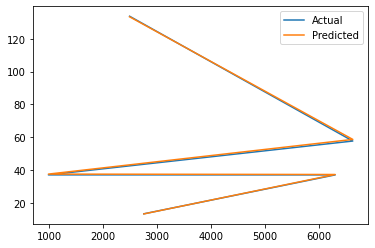

In [ ]:
#graph of comparission of actual and predicted values
graph = temp_df.head(5)
graph.plot()

In [ ]:
#finding accuracy 
r2_score = regressor.score(X_test_transformed,y_test)
accuracy = r2_score*100
print("accuracy:",accuracy,'%')

accuracy: 99.98428899033055 %


### **Random Forest**

In [ ]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestRegressor


In [ ]:
# training the model
rf_model = RandomForestRegressor()
mymodel = rf_model.fit(X_train_transformed,y_train)


In [ ]:
#predicting values
pred_y = mymodel.predict(X_test_transformed)

In [ ]:
#printing accuracy
from sklearn.metrics import r2_score
r2_score(pred_y,y_test)

0.9997338338109607

In [ ]:
#understanding difference between actual and predicted values
dframe = pd.DataFrame({'Actual':y_test, 'Predicted':pred_y})
dframe.head(5)

,Actual,Predicted
2488,133.720001,133.792299
6625,57.750000,59.713000
983,37.150002,37.524700
6299,37.139999,37.049199
2752,13.450000,13.150300


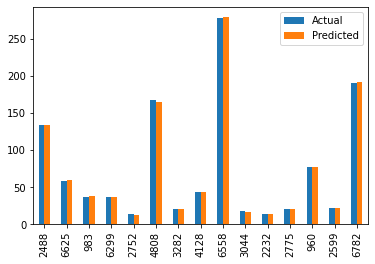

In [ ]:
#bar graph
graph = dframe.head(15)
graph.plot(kind='bar')

## **Saving model(serialization)**

In [ ]:
import pickle
from pickle import dump
path ='/content/gdrive/MyDrive/stock_price_prediction/Models/'

pickle_out = open(path +"standard_scaler.pkl" ,"wb")
pickle.dump(scaler,pickle_out)
pickle_out.close()

pickle_out1 = open(path +'lr_regg_model.pkl' ,'wb')
pickle.dump(regressor,pickle_out1)
pickle_out1.close()

pickle_out2 = open(path +'randomforest_model.pkl' ,'wb')
pickle.dump(rf_model,pickle_out2)
pickle_out2.close()

### **Loading models(deserialization)**

In [ ]:
import pickle
#from pickle import dump
path ='/content/gdrive/MyDrive/stock_price_prediction/Models/'

pickle_in = open(path +'standard_scaler.pkl' , 'rb')
scaler =pickle.load(pickle_in)

pickle_in1 = open(path +'lr_regg_model.pkl' , 'rb')
lr_reggression =pickle.load(pickle_in1)

pickle_in2 = open(path +'randomforest_model.pkl' , 'rb')
rf_model =pickle.load(pickle_in2)

### **Production ready code**

In [ ]:
# Read the Query Data

print("Enter stock Details")
Symbol = float(input('Enter the Symbol : '))
High = float(input('Enter the High : '))
Low = float(input('Enter the Low : '))
open= float(input('Enter the open: '))

cat_encode = {'FB':1, 'PINS':2, 'TWTR':3, 'SNAP':4, 'ETSY':5}
num_scal=scaler.transform([[High,Low,open]])
#num_scal.flatten()
cat_encod=np.array(Symbol)

query_to_predict =np.concatenate((cat_encod, num_scal), axis=None).reshape(1,-1)

closing_lr =lr_reggression.predict(query_to_predict)
closing_rf= rf_model.predict(query_to_predict)
print(closing_lr)
print(closing_rf)


Enter stock Details
Enter the Symbol : 5
Enter the High : 120
Enter the Low : 25
Enter the open: 130
[442.78343129]
[132.3107]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
lr_reggression.predict(query_to_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([460.99587594])

In [ ]:
rf_model.predict(query_to_predict)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([250.71519821])